$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/ofer.nissim/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-25 Python-3.8.12 torch-1.10.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Calculate the number of pixels within a bounding box and the number in the background.
   
   **Hint**: Given you stored the model output in a varibale named 'results', you may find 'results.pandas().xyxy' helpful 
4. Look at the inference results and answer the question below.


Results for image 1:


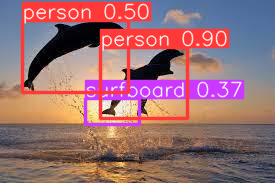

         xmin       ymin        xmax        ymax  confidence  class       name
0  100.278381  47.370995  187.863556  118.462662    0.903491      0     person
1   22.531363  20.887983  128.905212   92.257050    0.500973      0     person
2   85.617989  98.014702  139.018356  124.627922    0.367016     37  surfboard

- Number of Bounded Pixels:  13162
- Number of Background Pixels: 37163


Results for image 2:


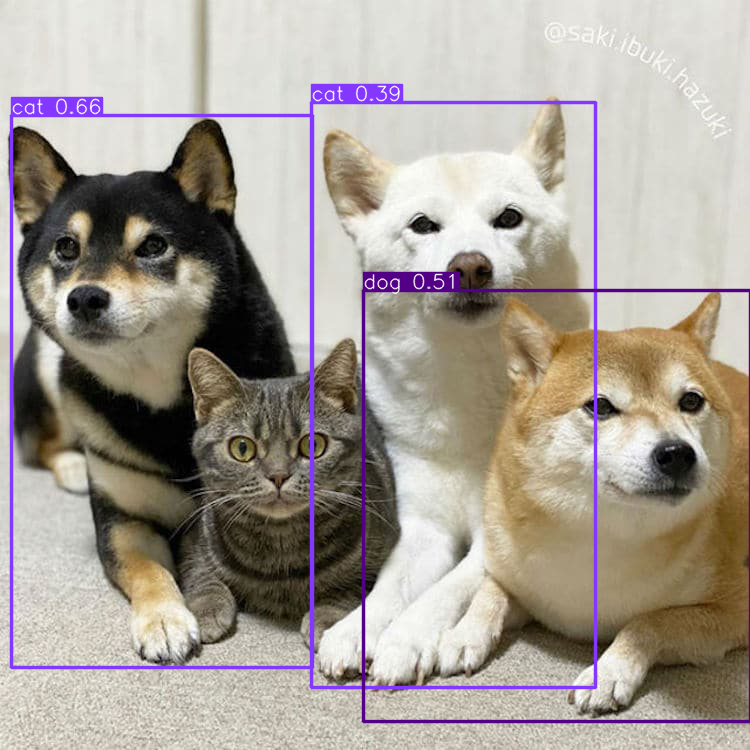

         xmin        ymin        xmax        ymax  confidence  class name
0   11.568563  115.774918  312.757080  667.323730    0.655977     15  cat
1  363.715485  290.178558  750.000000  721.983826    0.509416     16  dog
2  311.190765  102.437584  595.031799  687.870605    0.391701     15  cat

- Number of Bounded Pixels:  406233
- Number of Background Pixels: 156267




In [39]:
#Insert the inference code here.
import cv2

from shapely.geometry import Polygon
from shapely.geometry import box
from shapely.ops import unary_union


def get_boxes_unified_area(results):
    polygons = []
    objects = results.pandas().xyxy[0]
    
    for current_box in range(len(objects)):
        boundaries_coordinates = objects.iloc[current_box][:4]
        polygons.append(Polygon(box(*boundaries_coordinates)))
        
    # unify all the polygons boxes and get the unified area
    return unary_union(polygons).area 

def results_show(im_path):
    results_show.i += 1
    # Inference
    results = model(im_path)
    
    # Get number of pixels within a bounding box
    num_pixels_bounded_box = get_boxes_unified_area(results)
    
    # Get number of pixels in the background
    img = cv2.imread(im_path)
    num_pixels_total = img.shape[0] * img.shape[1]
    
    # show the results
    print("\033[1m" +f"Results for image {results_show.i}:")
    results.show()
    print(results.pandas().xyxy[0])
    print(f"\n- Number of Bounded Pixels:  {num_pixels_bounded_box:.0f}\n- Number of Background Pixels: {(num_pixels_total - num_pixels_bounded_box):.0f}\n\n") 


results_show.i = 0
results_show(img1)
results_show(img2)


### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.

In [ ]:
display_answer(hw2.answers.part6_q1)


## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

Demonstrating occlusion:


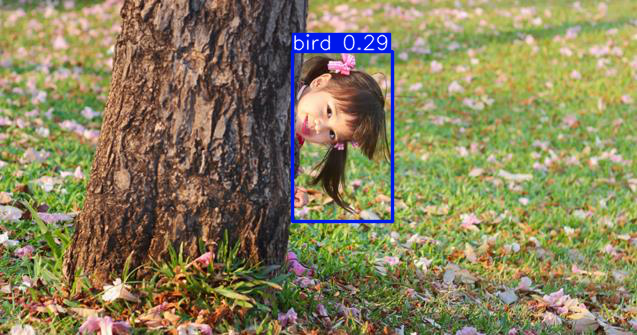

         xmin      ymin       xmax       ymax  confidence  class  name
0  292.150452  51.38649  392.23999  221.99379    0.290816     14  bird
Demonstrating model bias:


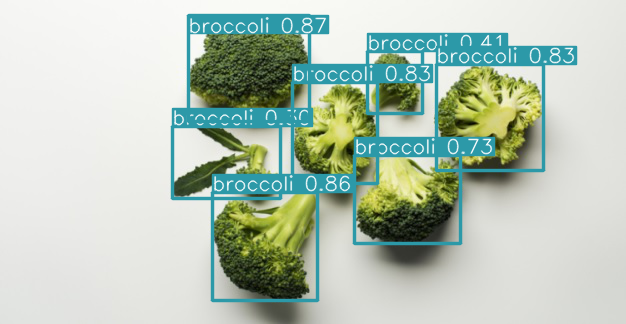

         xmin        ymin        xmax        ymax  confidence  class      name
0  188.117157   15.823583  309.939575  121.938164    0.873822     50  broccoli
1  212.557709  192.194000  317.261322  300.682648    0.858935     50  broccoli
2  436.078705   64.828209  543.764587  170.266571    0.830606     50  broccoli
3  292.968903   82.298508  377.604950  183.822052    0.826062     50  broccoli
4  354.559540  155.354950  460.968323  243.924286    0.729119     50  broccoli
5  367.578979   51.301067  422.101227  113.886742    0.414887     50  broccoli
6  172.413528  126.041687  280.468231  198.472244    0.295965     50  broccoli
Demonstrating blurring:


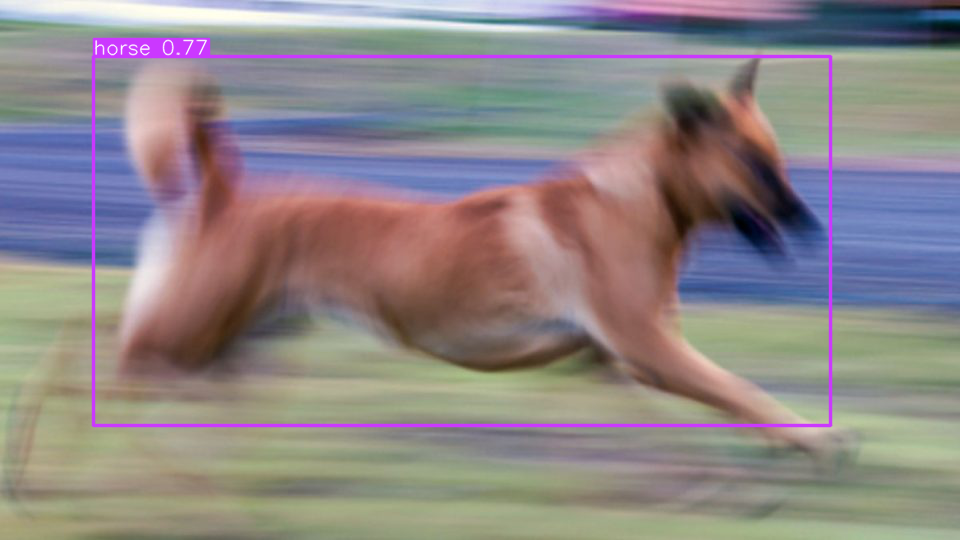

        xmin       ymin        xmax        ymax  confidence  class   name
0  93.195099  56.552513  830.170715  425.511475    0.768481     17  horse


In [46]:
#Insert the inference code here.

# Images
img1 = 'taken_imgs/occlusion-kid.jpg'  
img2 = 'taken_imgs/bias-broccoli.jpg' 
img3 = 'taken_imgs/blurry-dog.jpg'

# show the results
print('Demonstrating occlusion:')
results = model(img1)
results.show()
print(results.pandas().xyxy[0])

print('Demonstrating model bias:')
results = model(img2)
results.show()
print(results.pandas().xyxy[0])

print('Demonstrating blurring:')
results = model(img3)
results.show()
print(results.pandas().xyxy[0])

### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [ ]:
display_answer(hw2.answers.part6_q3)


## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

In [ ]:
#insert bonus code here

In [ ]:
display_answer(hw2.answers.part6_bonus)
